In [104]:
import pandas as pd

file_path = 'university_enrolment_headcount_2022-23.xlsx'
data = pd.ExcelFile(file_path)

print(data.sheet_names)

gender_data = data.parse('Gender')

gender_data.head()

['Notes', 'Gender', 'Country', 'Program', 'Tongue', 'CIP', 'Status', 'Age', 'Study Year', 'Campus', 'Credential']


,Institution,Fiscal Year,Study Level,Gender Group,HEADCOUNT
0,Algoma,2012-2013,Undergraduate,Female,569
1,Algoma,2012-2013,Undergraduate,Male,539
2,Algoma,2013-2014,Undergraduate,Female,570
3,Algoma,2013-2014,Undergraduate,Male,648
4,Algoma,2014-2015,Undergraduate,Female,559


In [105]:
gender_data['HEADCOUNT'] = pd.to_numeric(gender_data['HEADCOUNT'], errors='coerce')
gender_data['Gender Group'] = gender_data['Gender Group'].replace('N/A or Another', 'LGBTQ')

grouped_data = gender_data.groupby(
    ['Institution', 'Fiscal Year', 'Study Level', 'Gender Group']
)['HEADCOUNT'].sum().reset_index()

pivot_data = grouped_data.pivot_table(
    index=['Institution', 'Fiscal Year', 'Study Level'],
    columns='Gender Group',
    values='HEADCOUNT',
    fill_value=0
).reset_index()

pivot_data.columns.name = None
pivot_data.rename(columns={'Female': 'Female Count', 'Male': 'Male Count', 'LGBTQ': 'LGBTQ Count'}, inplace=True)

pivot_data.head()

,Institution,Fiscal Year,Study Level,Female Count,LGBTQ Count,Male Count
0,Algoma,2012-2013,Undergraduate,569.0,0.0,539.0
1,Algoma,2013-2014,Undergraduate,570.0,0.0,648.0
2,Algoma,2014-2015,Undergraduate,559.0,0.0,630.0
3,Algoma,2015-2016,Undergraduate,515.0,0.0,566.0
4,Algoma,2016-2017,Undergraduate,501.0,0.0,497.0


In [106]:
# Filter institutions by study level
undergraduate_institutions = gender_data[gender_data['Study Level'] == 'Undergraduate']['Institution'].unique()
graduate_institutions = gender_data[gender_data['Study Level'] == 'Graduate']['Institution'].unique()

# Display the results
{
    "Undergraduate Institutions": undergraduate_institutions.tolist(),
    "Graduate Institutions": graduate_institutions.tolist()
}


{'Undergraduate Institutions': ['Algoma',
  'Brock',
  'Carleton',
  'Dominican',
  'Guelph',
  'Hearst',
  'Lakehead',
  'Laurentian',
  'McMaster',
  'Metropolitan',
  'Nipissing',
  'NOSMU',
  'OCADU',
  'Ontario Tech',
  'Ottawa',
  "Queen's",
  'Toronto',
  'Trent',
  'UOF',
  'Waterloo',
  'Western',
  'Wilfrid Laurier',
  'Windsor',
  'York'],
 'Graduate Institutions': ['Brock',
  'Carleton',
  'Dominican',
  'Guelph',
  'Hearst',
  'Lakehead',
  'Laurentian',
  'McMaster',
  'Metropolitan',
  'Nipissing',
  'NOSMU',
  'OCADU',
  'Ontario Tech',
  'Ottawa',
  "Queen's",
  'Toronto',
  'Trent',
  'Waterloo',
  'Western',
  'Wilfrid Laurier',
  'Windsor',
  'York']}

In [107]:
filtered_data.to_csv("filtered_universities.csv", index=False)
print("Filtered data saved to 'filtered_universities.csv'.")


Filtered data saved to 'filtered_universities.csv'.


In [108]:
# Display the first few rows of the filtered dataframe
filtered_data.head()

,Institution,Fiscal Year,Study Level,Gender Group,HEADCOUNT
27,Brock,2012-2013,Undergraduate,Female,8419.0
28,Brock,2012-2013,Undergraduate,Male,6255.0
29,Brock,2012-2013,Graduate,Female,709.0
30,Brock,2012-2013,Graduate,Male,471.0
31,Brock,2013-2014,Undergraduate,Female,8386.0


## check male and female students ratio for each school for the last year

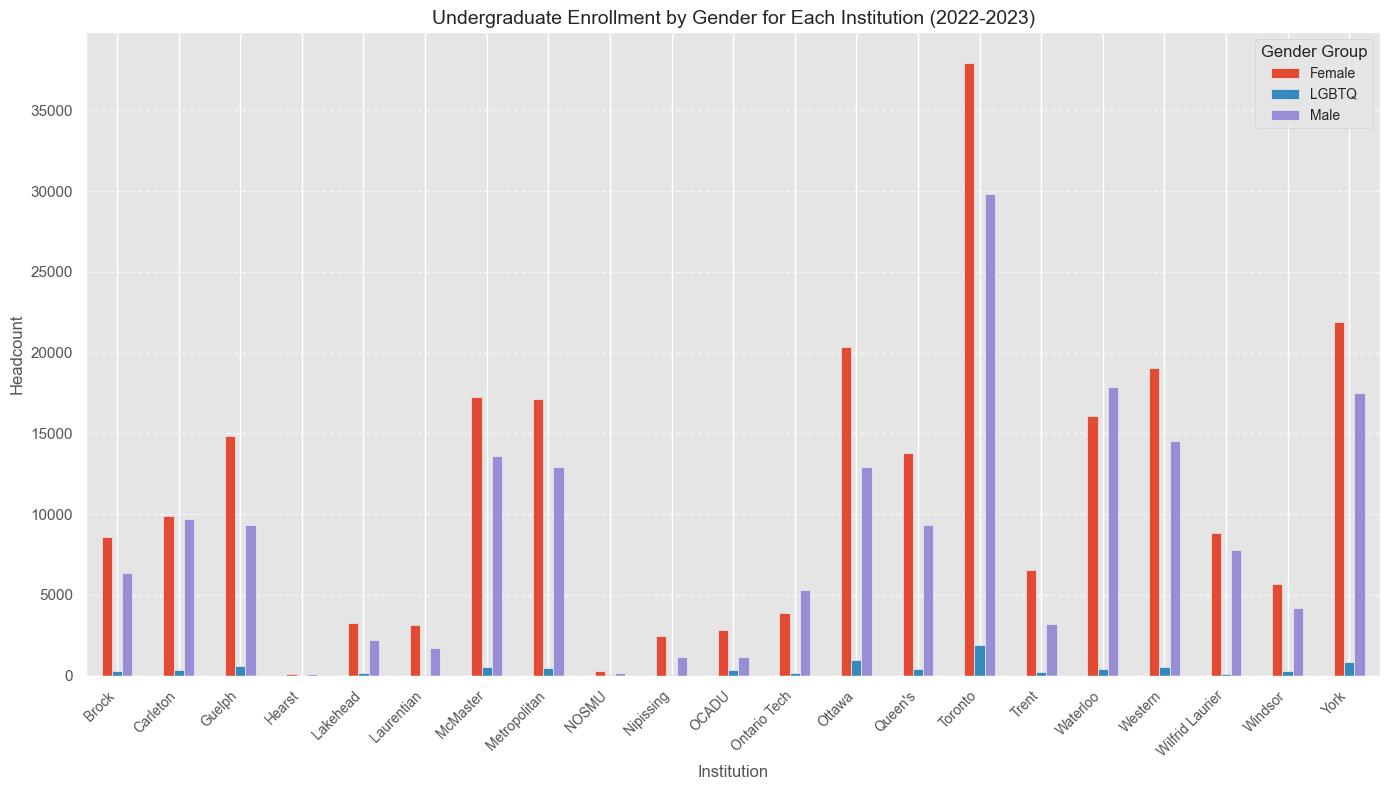

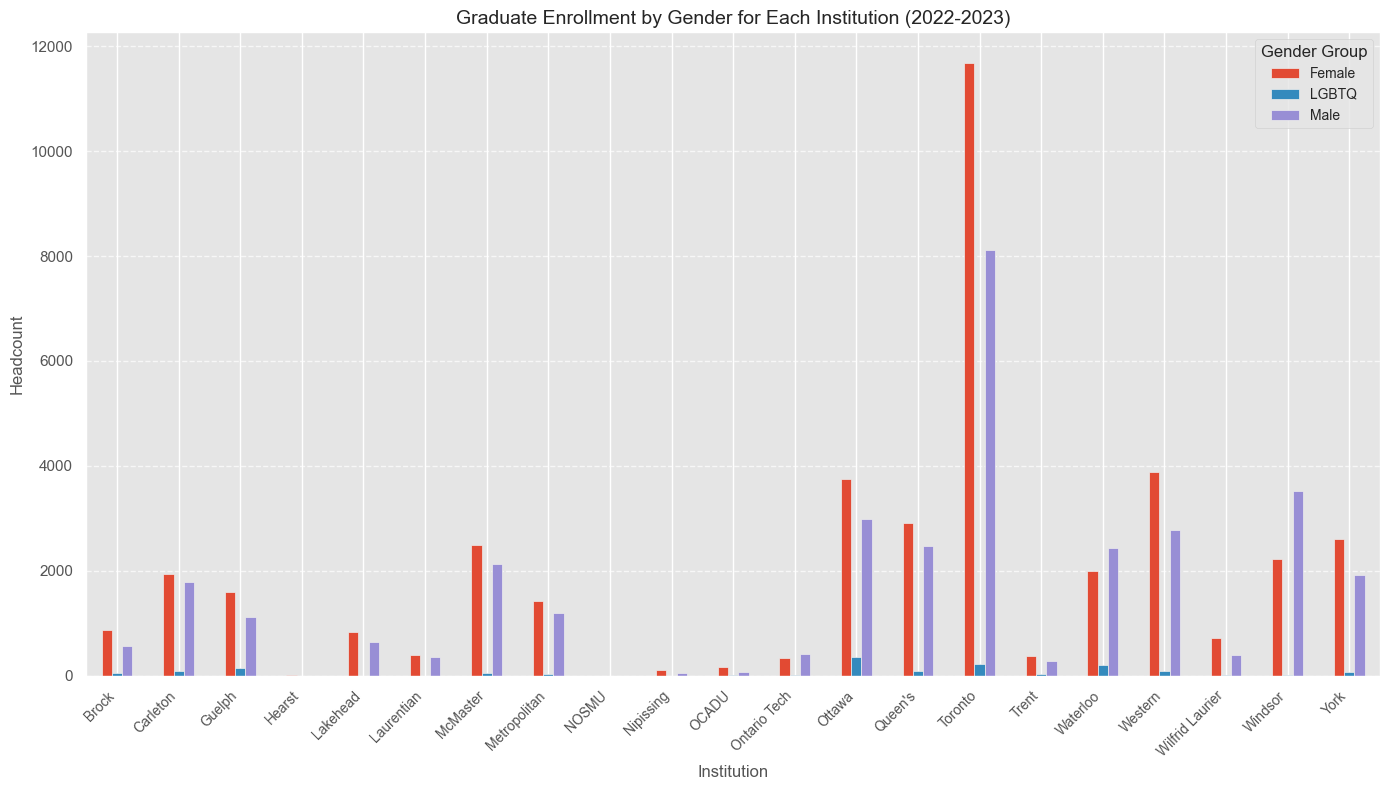

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Assuming filtered_data is already loaded and defined.
# Ensure 'Fiscal Year' and 'HEADCOUNT' columns exist and are valid.
# If filtered_data is not loaded, it can be reloaded from the original data source:
# filtered_data = gender_data

# Filter data for the 2022-2023 fiscal year
filtered_data_2022_2023 = filtered_data[filtered_data['Fiscal Year'] == '2022-2023']

# Split data into undergraduate and graduate levels
undergraduate_data_2022_2023 = filtered_data_2022_2023[filtered_data_2022_2023['Study Level'] == 'Undergraduate']
graduate_data_2022_2023 = filtered_data_2022_2023[filtered_data_2022_2023['Study Level'] == 'Graduate']

# Group undergraduate data by institution and gender, summing the headcount
bar_data_undergrad = undergraduate_data_2022_2023.groupby(['Institution', 'Gender Group'])['HEADCOUNT'].sum().unstack()

# Group graduate data by institution and gender, summing the headcount
bar_data_grad = graduate_data_2022_2023.groupby(['Institution', 'Gender Group'])['HEADCOUNT'].sum().unstack()

# Plot bar chart for undergraduate students (2022-2023)
bar_data_undergrad.plot(kind='bar', figsize=(14, 8), stacked=False)
plt.title('Undergraduate Enrollment by Gender for Each Institution (2022-2023)', fontsize=14)
plt.xlabel('Institution', fontsize=12)
plt.ylabel('Headcount', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Gender Group', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot bar chart for graduate students (2022-2023)
bar_data_grad.plot(kind='bar', figsize=(14, 8), stacked=False)
plt.title('Graduate Enrollment by Gender for Each Institution (2022-2023)', fontsize=14)
plt.xlabel('Institution', fontsize=12)
plt.ylabel('Headcount', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Gender Group', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Surprisingly, the insight suggests that the number of female students enrolled in undergraduate and graduate programs is higher than that of male students.

## Check which Ontario university has the highest number of students enrolled.

In [110]:
import pandas as pd
import plotly.graph_objects as go

# Load the Gender sheet
gender_data = data.parse('Gender')

# Ensure 'HEADCOUNT' is numeric
gender_data['HEADCOUNT'] = pd.to_numeric(gender_data['HEADCOUNT'], errors='coerce')

# Check if the dataset contains the 'Fiscal Year' column
if 'Fiscal Year' in gender_data.columns:
    recent_year_check = gender_data['Fiscal Year'].unique()
    print(f"Available years in the dataset: {recent_year_check}")

    # Check if 2022-2023 data exists
    if '2022-2023' in recent_year_check:
        print("The data includes 2022-2023.")

        # Filter data for 2022-2023
        filtered_data_2022_2023 = gender_data[gender_data['Fiscal Year'] == '2022-2023']

        # Recalculate total headcount by study level and institution
        study_level_distribution_2022_2023 = filtered_data_2022_2023.groupby(['Institution', 'Study Level'])['HEADCOUNT'].sum().unstack()

        # Plot undergraduate distribution for 2022-2023
        fig_undergrad_2022_2023 = go.Figure(
            data=[
                go.Pie(
                    labels=study_level_distribution_2022_2023.index,
                    values=study_level_distribution_2022_2023['Undergraduate'],
                    textinfo='percent+label',
                    insidetextorientation='horizontal',
                    hole=0.3
                )
            ]
        )
        fig_undergrad_2022_2023.update_layout(
            title_text='Undergraduate Enrollment Distribution by Institution (2022-2023)',
            title_x=0.5,
            showlegend=True,
            margin=dict(t=50, b=50, l=50, r=50),
            height=1200,
            width=1200
        )
        fig_undergrad_2022_2023.show()

        # Plot graduate distribution for 2022-2023
        fig_grad_2022_2023 = go.Figure(
            data=[
                go.Pie(
                    labels=study_level_distribution_2022_2023.index,
                    values=study_level_distribution_2022_2023['Graduate'],
                    textinfo='percent+label',
                    insidetextorientation='horizontal',
                    hole=0.3
                )
            ]
        )
        fig_grad_2022_2023.update_layout(
            title_text='Graduate Enrollment Distribution by Institution (2022-2023)',
            title_x=0.5,
            showlegend=True,
            margin=dict(t=50, b=50, l=50, r=50),
            height=1200,
            width=1200
        )
        fig_grad_2022_2023.show()
    else:
        print("The data does not include 2022-2023.")
else:
    print("The dataset does not contain a 'Fiscal Year' column.")


Available years in the dataset: ['2012-2013' '2013-2014' '2014-2015' '2015-2016' '2016-2017' '2017-2018'
 '2018-2019' '2019-2020' '2020-2021' '2021-2022' '2022-2023']
The data includes 2022-2023.


# The University of Toronto has proven to be the most popular one.

## Check which major is the most popular among students enrolled at the University of Toronto

In [111]:
import pandas as pd
import plotly.graph_objects as go

# Filter data for University of Toronto
uoft_cip_data = cip_data[cip_data['Institution'] == 'Toronto']

# Filter undergraduate and graduate data
uoft_undergrad = uoft_cip_data[uoft_cip_data['Study Level'] == 'Undergraduate']
uoft_grad = uoft_cip_data[uoft_cip_data['Study Level'] == 'Graduate']

# Group by 'CIP(e) title' and sum the headcount for undergraduate and graduate levels
top10_undergrad_programs = (
    uoft_undergrad.groupby('CIP(e) title')['HEADCOUNT'].sum()
    .sort_values(ascending=False)
    .head(10)
)
top10_grad_programs = (
    uoft_grad.groupby('CIP(e) title')['HEADCOUNT'].sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot pie chart for top 10 undergraduate programs
fig_undergrad_top10 = go.Figure(
    data=[
        go.Pie(
            labels=top10_undergrad_programs.index,
            values=top10_undergrad_programs.values,
            textinfo='percent+label',
            insidetextorientation='horizontal',
            hole=0.3
        )
    ]
)
fig_undergrad_top10.update_layout(
    title_text="Top 10 Undergraduate Programs by Enrollment at University of Toronto",
    title_x=0.5,
    height=1200,
    width=1200,
    showlegend=True
)
fig_undergrad_top10.show()

# Plot pie chart for top 10 graduate programs
fig_grad_top10 = go.Figure(
    data=[
        go.Pie(
            labels=top10_grad_programs.index,
            values=top10_grad_programs.values,
            textinfo='percent+label',
            insidetextorientation='horizontal',
            hole=0.3
        )
    ]
)
fig_grad_top10.update_layout(
    title_text="Top 10 Graduate Programs by Enrollment at University of Toronto",
    title_x=0.5,
    height=1200,
    width=1200,
    showlegend=True
)
fig_grad_top10.show()


# General studies tend to be the most popular major in undergraduate programs, while business administration is the most popular choice in graduate programs